In [8]:
import pandas as pd

from common.config import IDPA_DATASET, WIENER_NOKERNEL_DATASET, WIENER_WKERNEL_DATASET, DEBLURGANV2_DATASET

img_df = pd.read_parquet(IDPA_DATASET)
wiener_nk_df = pd.read_parquet(WIENER_NOKERNEL_DATASET)
wiener_wk_df = pd.read_parquet(WIENER_WKERNEL_DATASET)
deblurganv2_df = pd.read_parquet(DEBLURGANV2_DATASET)

,url,category,key,width,height,exif,aspect_ratio,size,rms_contrast,sobel_edge_strength,canny_edge_density,box_size,gaussian_sigma,gaussian_size,motion_length,motion_angle
count,1250,1250,1250,950.000000,950.000000,950,950.000000,9.500000e+02,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
unique,1250,13,1250,NaN,NaN,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,https://zet.gallery/storage/images/products/fd...,people,000000527,NaN,NaN,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,100,1,NaN,NaN,533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1556.865263,1361.677895,NaN,1.215505,3.510588e+06,0.241307,63.759947,0.128991,10.117895,2.199617,13.461053,17.590526,183.191937
std,NaN,NaN,NaN,461.015906,434.723050,NaN,0.383402,1.992244e+06,0.054723,25.274638,0.057644,3.151395,0.995533,5.549477,7.629577,103.763953
min,NaN,NaN,NaN,170.000000,117.000000,NaN,0.463392,7.694000e+03,0.060424,8.266673,0.000000,5.000000,0.515940,5.000000,5.000000,0.618597
25%,NaN,NaN,NaN,1223.000000,1080.000000,NaN,0.800500,2.274401e+06,0.204291,45.575302,0.088474,7.000000,1.348071,9.000000,11.000000,91.414728
50%,NaN,NaN,NaN,1500.000000,1280.000000,NaN,1.333333,3.223864e+06,0.239974,61.044392,0.123753,10.000000,2.155779,13.000000,18.000000,181.171951
75%,NaN,NaN,NaN,1920.000000,1600.000000,NaN,1.500000,4.179430e+06,0.277998,78.197440,0.162452,13.000000,3.062990,19.000000,24.000000,272.798978


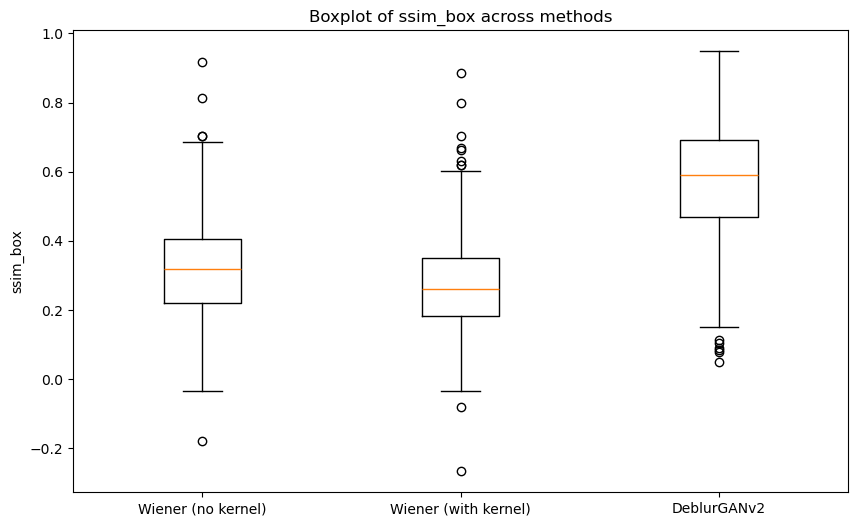

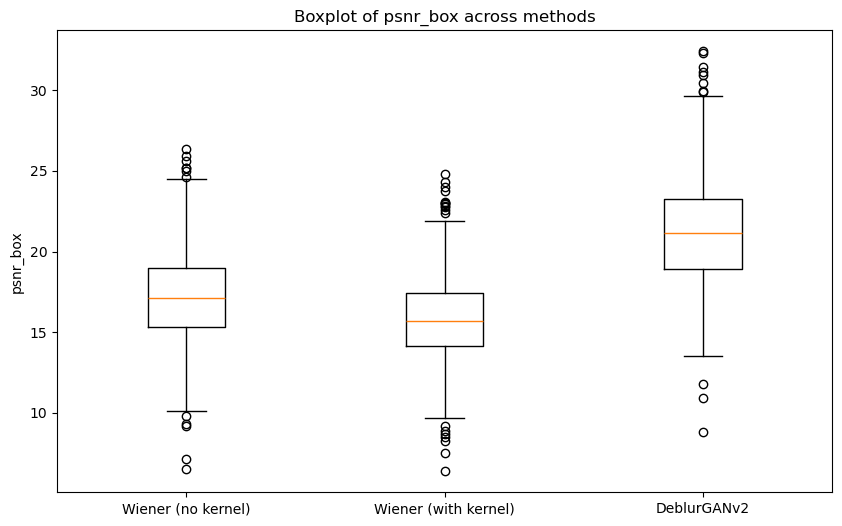

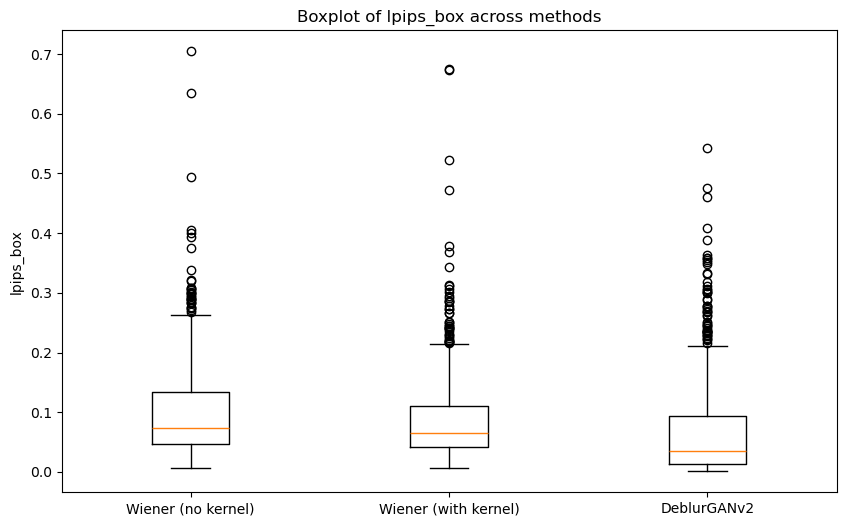

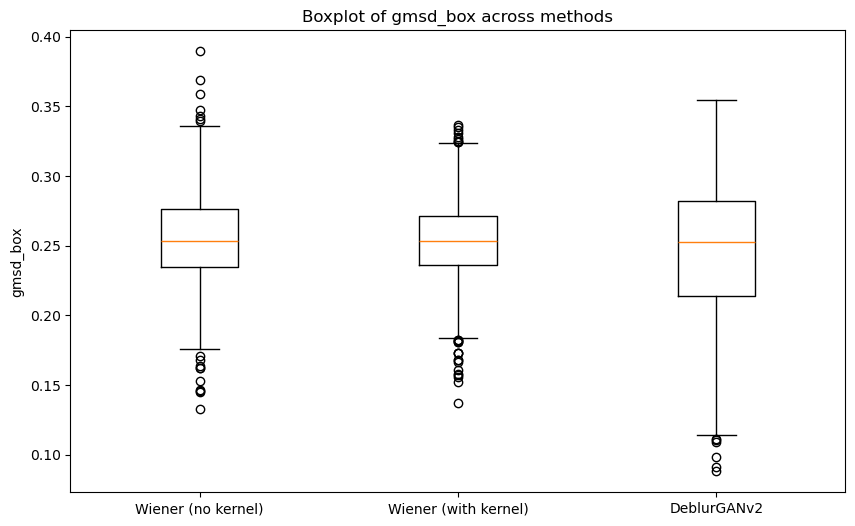

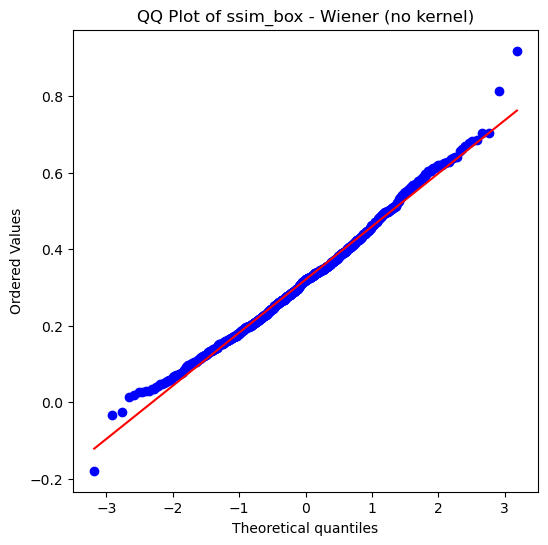

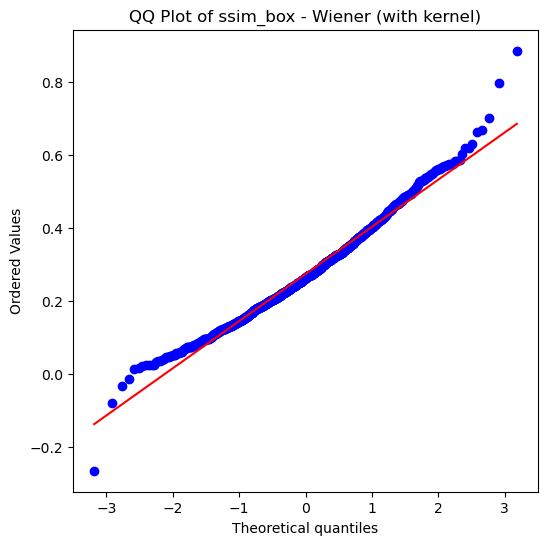

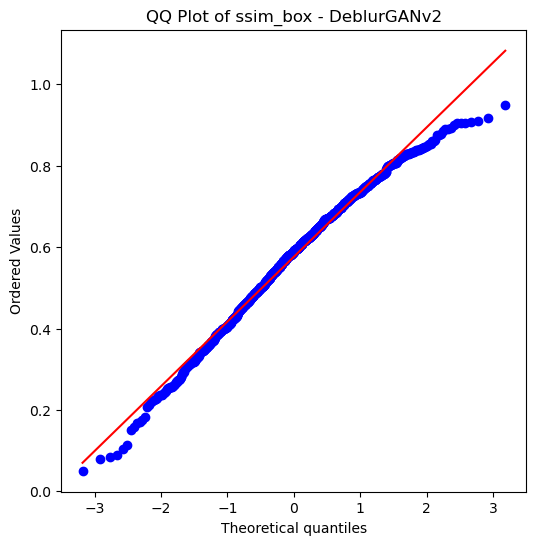

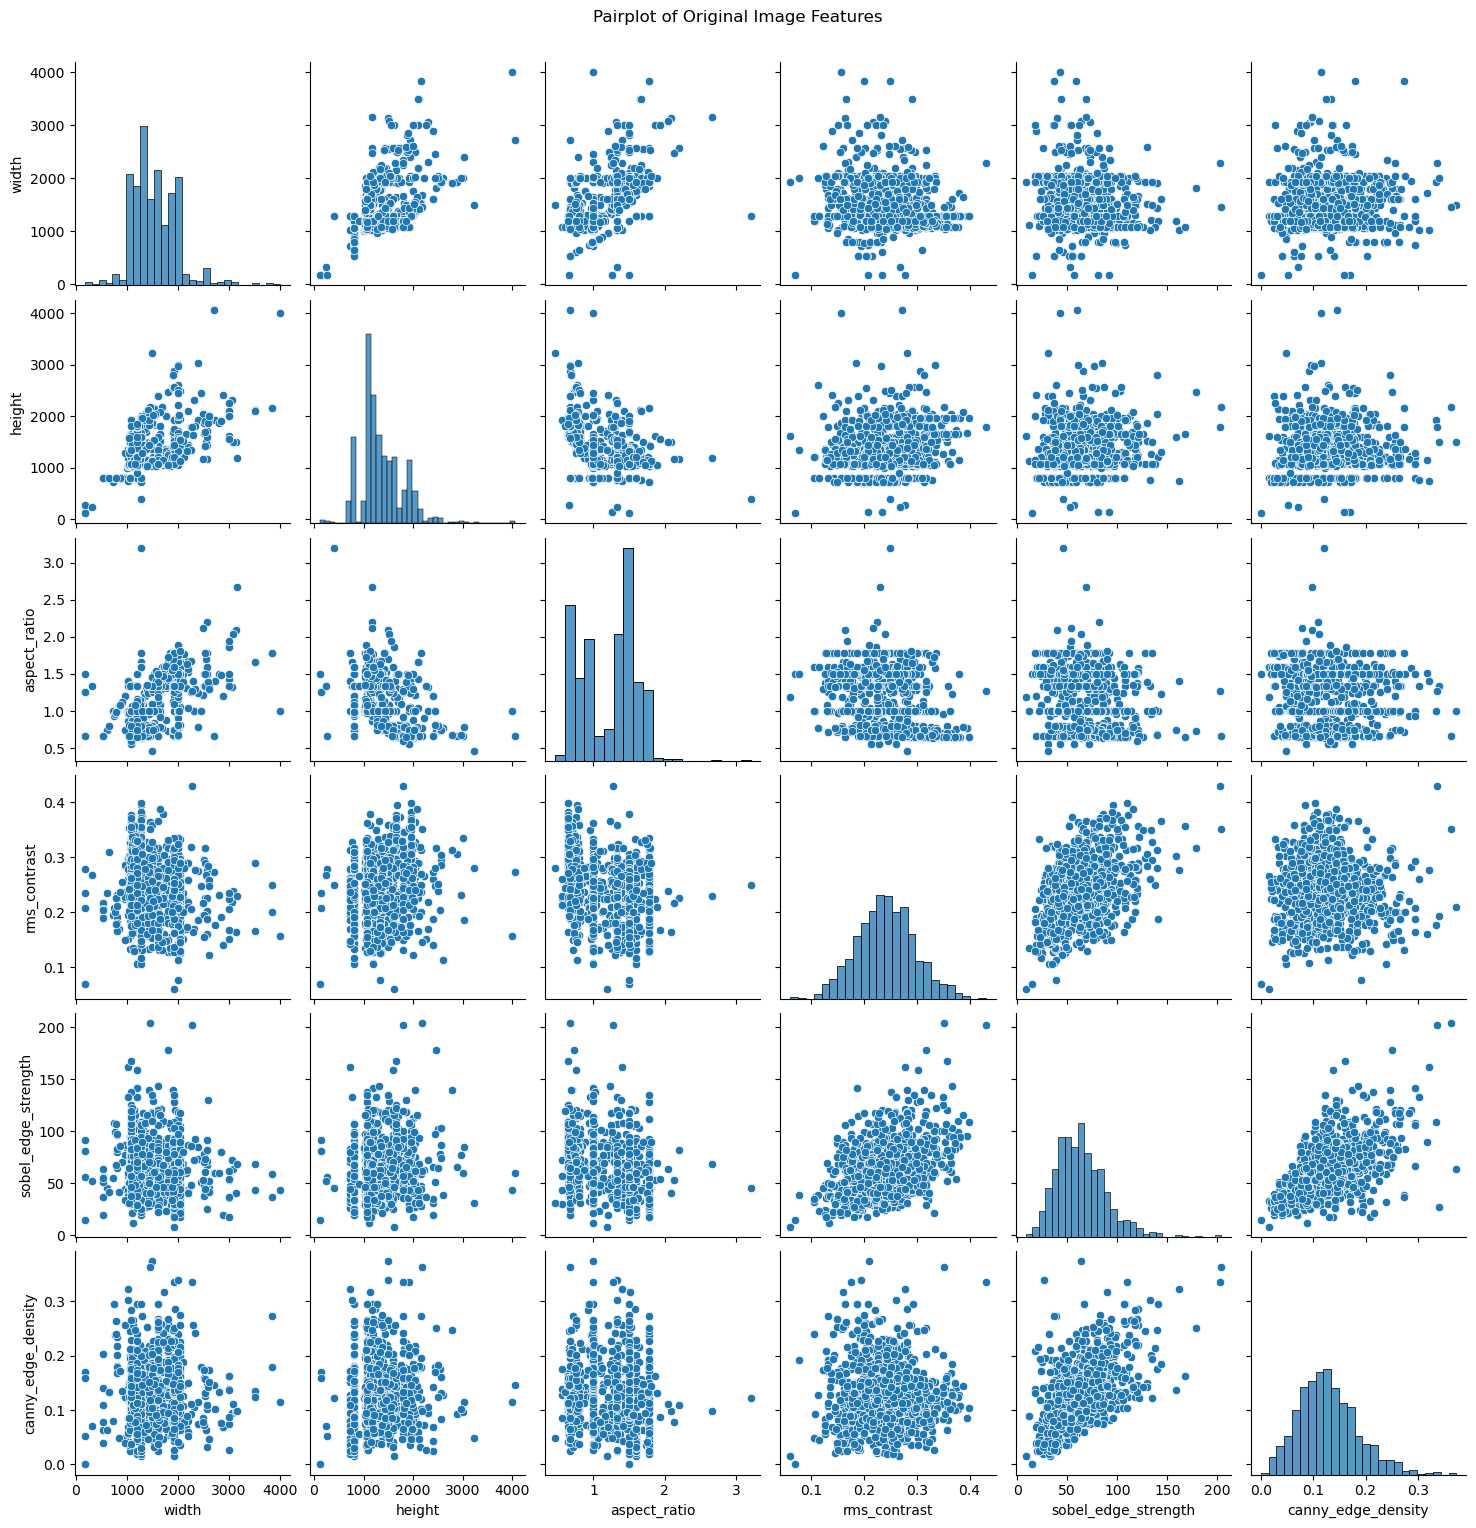

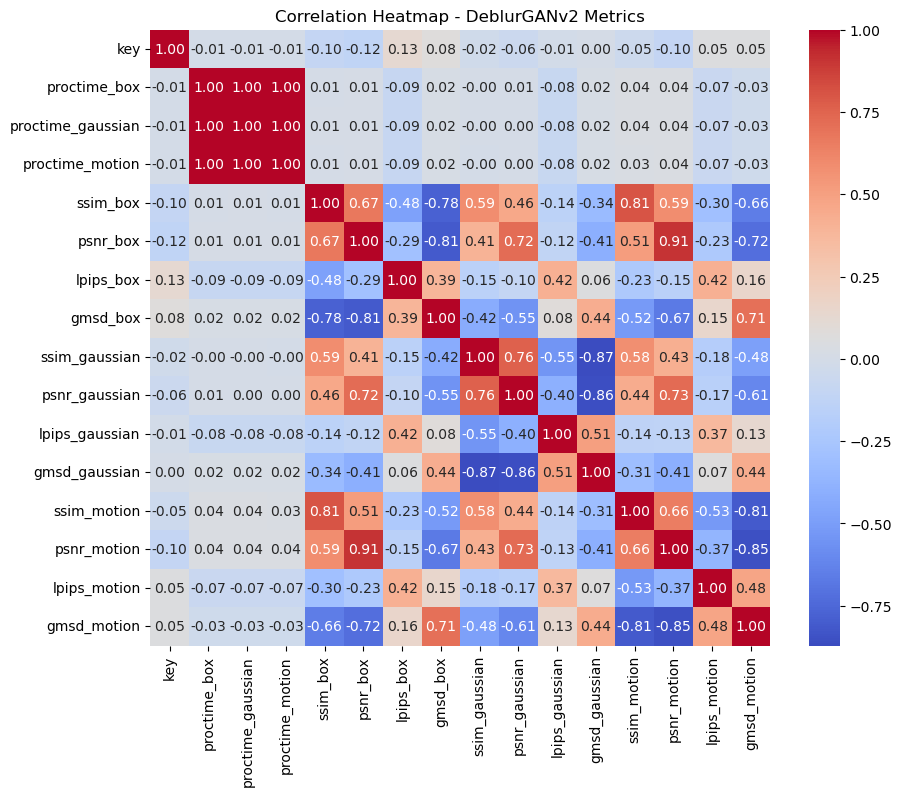

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Summary statistics for original image features
display(img_df.describe(include='all'))

# 2. Box plots for key metrics across methods
metrics = ['ssim_box', 'psnr_box', 'lpips_box', 'gmsd_box']
methods = {
    'Wiener (no kernel)': wiener_nk_df,
    'Wiener (with kernel)': wiener_wk_df,
    'DeblurGANv2': deblurganv2_df
}

for metric in metrics:
    plt.figure(figsize=(10, 6))
    data = [df[metric] for df in methods.values()]
    plt.boxplot(data, tick_labels=methods.keys())
    plt.title(f'Boxplot of {metric} across methods')
    plt.ylabel(metric)
    plt.show()

# 3. QQ plots for normality check of a metric (e.g., ssim_box)
for name, df in methods.items():
    plt.figure(figsize=(6, 6))
    stats.probplot(df['ssim_box'], dist="norm", plot=plt)
    plt.title(f'QQ Plot of ssim_box - {name}')
    plt.show()

# 4. Pairplot for original image features
sns.pairplot(img_df[['width', 'height', 'aspect_ratio', 'rms_contrast', 'sobel_edge_strength', 'canny_edge_density']].dropna())
plt.suptitle('Pairplot of Original Image Features', y=1.02)
plt.show()

# 5. Correlation heatmap for metrics in one method (e.g., DeblurGANv2)
plt.figure(figsize=(10, 8))
sns.heatmap(deblurganv2_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - DeblurGANv2 Metrics')
plt.show()